# Filter

In this notebook, we would present different functionalities on filtering large-scale dataset

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Let’s continue with our NYC 311 service requests example.

In [3]:
complaints = pd.read_csv('https://media.githubusercontent.com/media/johnanthonyjose/python-data-analysis/master/Module3_Pandas/311-service-requests.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
complaints.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432.0,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378.0,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721041,-73.909453,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032.0,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.843330,-73.939144,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023.0,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778009,-73.980213,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027.0,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.807691,-73.947387,"(40.80769092704951, -73.94738703491433)"


In [5]:
complaints.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                       object
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Action Updated Date     object
Community Board                    object
Borough                           

## Gathering Only Selected Category.

Suppose we want to further investigate on samples wherein their Complaint Type is 'Noise - Street/Sidewalk'.

Before we continue, I suggest we check first the unique values along the column

In [6]:
cats = complaints['Complaint Type'].unique()

print("Total: ", len(cats))
cats

Total:  165


array(['Noise - Street/Sidewalk', 'Illegal Parking', 'Noise - Commercial',
       'Noise - Vehicle', 'Rodent', 'Blocked Driveway',
       'Noise - House of Worship', 'Street Light Condition',
       'Harboring Bees/Wasps', 'Taxi Complaint', 'Homeless Encampment',
       'Traffic Signal Condition', 'Food Establishment', 'Noise - Park',
       'Broken Muni Meter', 'Benefit Card Replacement',
       'Sanitation Condition', 'ELECTRIC', 'PLUMBING', 'HEATING',
       'GENERAL CONSTRUCTION', 'Street Condition', 'Consumer Complaint',
       'Derelict Vehicles', 'Noise', 'Drinking', 'Indoor Air Quality',
       'Panhandling', 'Derelict Vehicle', 'Lead', 'Water System',
       'Noise - Helicopter', 'Homeless Person Assistance',
       'Root/Sewer/Sidewalk Condition', 'Sidewalk Condition', 'Graffiti',
       'DOF Literature Request', 'Animal in a Park',
       'Overgrown Tree/Branches', 'Air Quality', 'Dirty Conditions',
       'Water Quality', 'Other Enforcement', 'Collection Truck Noise',
     

We could see that there are lot of categories! This is confusing. 

For now, let's focus on simplicity. Let's say we wanted to see 'Noise - Street/Sidewalk'

In [7]:
complaints[complaints['Complaint Type'] == 'Noise - Street/Sidewalk']

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432.0,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708275,-73.791604,"(40.70827532593202, -73.79160395779721)"
16,26594086,10/31/2013 12:54:03 AM,10/31/2013 02:16:39 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10310.0,173 CAMPBELL AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.636182,-74.116150,"(40.63618202176914, -74.1161500428337)"
25,26591573,10/31/2013 12:35:18 AM,10/31/2013 02:41:35 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10312.0,24 PRINCETON LANE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.553421,-74.196743,"(40.55342078716953, -74.19674315017886)"
28,26594085,10/31/2013 12:32:08 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10026.0,121 WEST 116 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.802390,-73.950526,"(40.80238950799943, -73.95052644123253)"
31,26595564,10/31/2013 12:30:36 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11236.0,AVENUE J,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634104,-73.911055,"(40.634103775951736, -73.91105541883589)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111044,26426096,10/04/2013 12:14:09 AM,10/04/2013 01:03:46 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10032.0,539 WEST 162 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.836532,-73.941018,"(40.836532082987944, -73.9410182995914)"
111048,26430030,10/04/2013 12:12:07 AM,10/04/2013 02:45:24 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10027.0,215 WEST 131ST STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.813339,-73.946328,"(40.81333907832113, -73.94632769228208)"
111054,26426060,10/04/2013 12:06:39 AM,10/04/2013 12:31:16 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11224.0,4823 BEACH 48 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.577515,-74.012207,"(40.57751513866536, -74.01220705163807)"
111059,26429040,10/04/2013 12:04:52 AM,10/04/2013 03:01:04 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10003.0,99 2 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.727251,-73.988660,"(40.727251287038676, -73.98866028603422)"


If you look at noise_complaints, you’ll see that this worked, and it only contains complaints with the right complaint type. But how does this work? Let’s deconstruct it into two pieces



In [8]:
complaints['Complaint Type'] == "Noise - Street/Sidewalk"

0          True
1         False
2         False
3         False
4         False
          ...  
111064    False
111065    False
111066     True
111067    False
111068    False
Name: Complaint Type, Length: 111069, dtype: bool

This is a big array of Trues and Falses, one for each row in our dataframe. When we index our dataframe with this array, we get just the rows where our boolean array evaluated to True. It’s important to note that for row filtering by a boolean array the length of our dataframe’s index must be the same length as the boolean array used for filtering.

You can also combine more than one condition with the & operator like this:

In [9]:
is_noise = complaints['Complaint Type'] == "Noise - Street/Sidewalk"
in_brooklyn = complaints['Borough'] == "BROOKLYN"
complaints[is_noise & in_brooklyn]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
31,26595564,10/31/2013 12:30:36 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11236.0,AVENUE J,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634104,-73.911055,"(40.634103775951736, -73.91105541883589)"
49,26595553,10/31/2013 12:05:10 AM,10/31/2013 02:43:43 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11225.0,25 LEFFERTS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.661793,-73.959934,"(40.6617931276793, -73.95993363978067)"
109,26594653,10/30/2013 11:26:32 PM,10/31/2013 12:18:54 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11222.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.724600,-73.954271,"(40.724599563793525, -73.95427134534344)"
236,26591992,10/30/2013 10:02:58 PM,10/30/2013 10:23:20 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11218.0,DITMAS AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.636169,-73.972455,"(40.63616876563881, -73.97245504682485)"
370,26594167,10/30/2013 08:38:25 PM,10/30/2013 10:26:28 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11218.0,126 BEVERLY ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.642922,-73.978762,"(40.6429222774404, -73.97876175474585)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111002,26431562,10/04/2013 01:02:45 AM,10/04/2013 04:43:24 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11230.0,630 RUGBY ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634234,-73.964065,"(40.63423411912724, -73.96406469568188)"
111006,26431994,10/04/2013 12:59:57 AM,10/04/2013 04:43:24 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11230.0,630 RUGBY ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634234,-73.964065,"(40.63423411912724, -73.96406469568188)"
111021,26432669,10/04/2013 12:42:45 AM,10/04/2013 06:48:20 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11249.0,125 TAYLOR STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.705733,-73.963381,"(40.70573258854396, -73.96338054284558)"
111035,26431005,10/04/2013 12:21:04 AM,10/04/2013 01:50:26 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11205.0,382 WILLOUGHBY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.692956,-73.955350,"(40.692955608285715, -73.95534962720475)"


Or if we just wanted a few columns:

In [10]:
complaints[is_noise & in_brooklyn][['Complaint Type', 'Borough', 'Created Date', 'Descriptor']]

,Complaint Type,Borough,Created Date,Descriptor
31,Noise - Street/Sidewalk,BROOKLYN,10/31/2013 12:30:36 AM,Loud Music/Party
49,Noise - Street/Sidewalk,BROOKLYN,10/31/2013 12:05:10 AM,Loud Talking
109,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 11:26:32 PM,Loud Music/Party
236,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 10:02:58 PM,Loud Talking
370,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 08:38:25 PM,Loud Music/Party
...,...,...,...,...
111002,Noise - Street/Sidewalk,BROOKLYN,10/04/2013 01:02:45 AM,Loud Music/Party
111006,Noise - Street/Sidewalk,BROOKLYN,10/04/2013 12:59:57 AM,Loud Talking
111021,Noise - Street/Sidewalk,BROOKLYN,10/04/2013 12:42:45 AM,Loud Talking
111035,Noise - Street/Sidewalk,BROOKLYN,10/04/2013 12:21:04 AM,Loud Music/Party


## which borough has the most noise complaints?

In [11]:
is_noise = complaints['Complaint Type'] == "Noise - Street/Sidewalk"
noise_complaints = complaints[is_noise]
noise_complaints['Borough'].value_counts()

MANHATTAN        917
BROOKLYN         456
BRONX            292
QUEENS           226
STATEN ISLAND     36
Unspecified        1
Name: Borough, dtype: int64

It’s Manhattan! But what if we wanted to divide by the total number of complaints, to make it make a bit more sense? That would be easy too:

In [12]:
noise_complaint_counts = noise_complaints['Borough'].value_counts()
complaint_counts = complaints['Borough'].value_counts()
noise_complaint_counts / complaint_counts.astype(float)

BRONX            0.014833
BROOKLYN         0.013864
MANHATTAN        0.037755
QUEENS           0.010143
STATEN ISLAND    0.007474
Unspecified      0.000141
Name: Borough, dtype: float64

Let's plot it

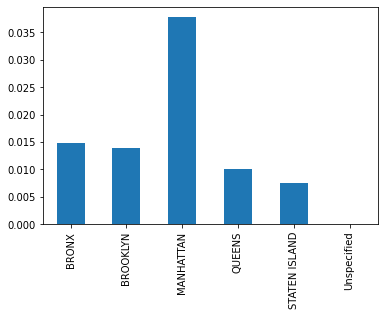

In [13]:
(noise_complaint_counts / complaint_counts.astype(float)).plot(kind='bar')